# Introduction au projet Building Perceptron

Ce projet s'inscrit dans le cadre d'une formation en Intelligence Artificielle et Data Science à La Plateforme_. Il vise à comprendre et mettre en œuvre le Perceptron, modèle fondamental en apprentissage automatique inventé par Frank Rosenblatt, qui constitue la base historique et conceptuelle des réseaux de neurones.

L’objectif principal est double : d’abord, développer une implémentation en Python du Perceptron à travers une approche orientée objet ; ensuite, appliquer ce modèle à un cas réel en utilisant le dataset Breast Cancer Wisconsin pour la classification binaire (diagnostic du cancer du sein, tumeur bénigne ou maligne).

Le projet se déroule en plusieurs phases intégrant une analyse exploratoire approfondie du dataset, une réduction de dimensionnalité pour optimiser les performances, puis l’entraînement et l’évaluation du Perceptron à l’aide de métriques adaptées au contexte médical.

Cette expérience permet à la fois d’acquérir des compétences pratiques en programmation et modélisation, mais aussi de consolider la compréhension des fondamentaux théoriques du Machine Learning.

In [49]:
### Chargement des bibliothèques ###
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from matplotlib.collections import PolyCollection
import matplotlib.patches as mpatches

# Définir le chemin du fichier
file_path = Path("Data") / "bcw_data.csv"  # équivaut à "data/data.csv"

### Chargement des données ###
data = pd.read_csv(file_path) # Charger les données dans un DataFrame pandas

In [50]:
### Exploration des données ###
data.info() # Informations sur le DataFrame
data.describe() # Statistiques descriptives
data.isnull().sum()  # Vérifier les valeurs manquantes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [37]:
### Séparation en Malin(M) et Bénin(B) ###
data_m = data[data['diagnosis'] == 'M']
data_b = data[data['diagnosis'] == 'B']

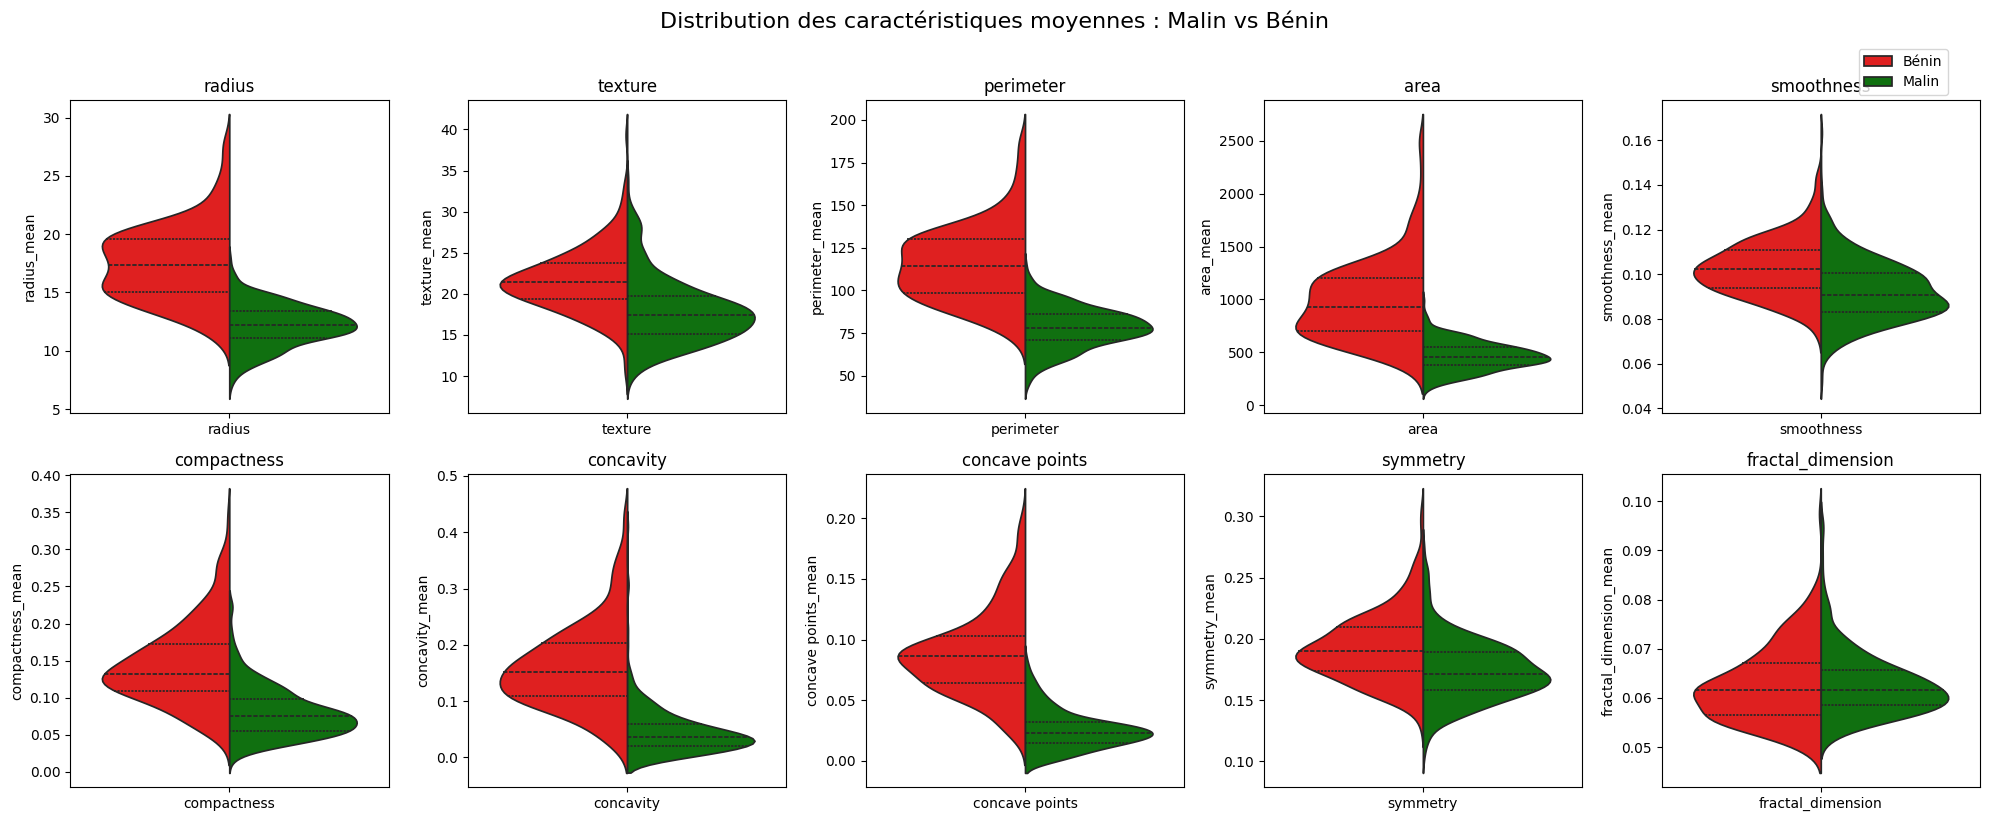

In [22]:
mean_features = ["radius_mean", "texture_mean", "perimeter_mean", "area_mean", 
                 "smoothness_mean", "compactness_mean", "concavity_mean", 
                 "concave points_mean", "symmetry_mean", "fractal_dimension_mean"]

fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

for i, feature in enumerate(mean_features):
    # Créer une variable temporaire pour chaque feature
    data_temp = data.copy()
    data_temp['var'] = feature.replace('_mean', '')
    
    sns.violinplot(data=data_temp, x="var", y=feature, 
                   hue="diagnosis", split=True, inner="quart",
                   palette={'M': 'red', 'B': 'green'}, ax=axes[i])
    axes[i].set_title(f'{feature.replace("_mean", "")}')
    axes[i].set_xlabel('')
    axes[i].legend().remove()  # Enlever la légende de chaque subplot

# Ajouter une légende globale
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, ['Bénin', 'Malin'], loc='upper right', bbox_to_anchor=(0.98, 0.98))

plt.suptitle('Distribution des caractéristiques moyennes : Malin vs Bénin', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

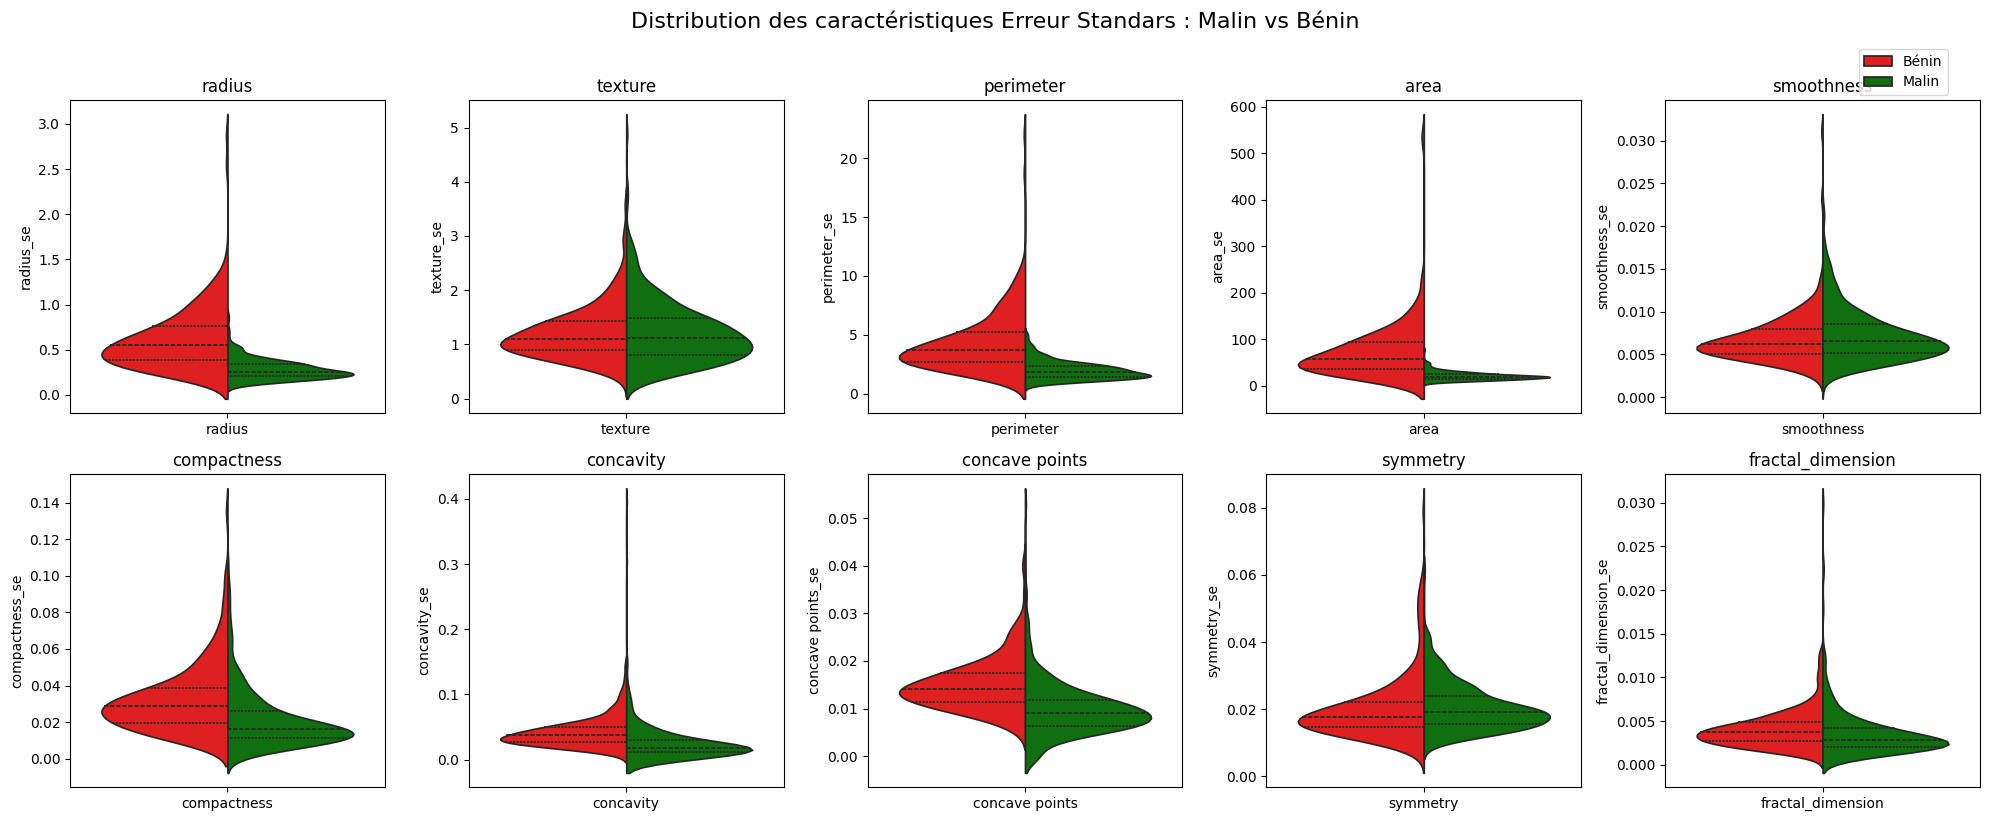

In [23]:
mean_features = ["radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se",
                 "concavity_se","concave points_se","symmetry_se","fractal_dimension_se"]

fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

for i, feature in enumerate(mean_features):
    # Créer une variable temporaire pour chaque feature
    data_temp = data.copy()
    data_temp['var'] = feature.replace('_se', '')
    
    sns.violinplot(data=data_temp, x="var", y=feature, 
                   hue="diagnosis", split=True, inner="quart",
                   palette={'M': 'red', 'B': 'green'}, ax=axes[i])
    axes[i].set_title(f'{feature.replace("_se", "")}')
    axes[i].set_xlabel('')
    axes[i].legend().remove()  # Enlever la légende de chaque subplot

# Ajouter une légende globale
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, ['Bénin', 'Malin'], loc='upper right', bbox_to_anchor=(0.98, 0.98))

plt.suptitle('Distribution des caractéristiques Erreur Standars : Malin vs Bénin', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

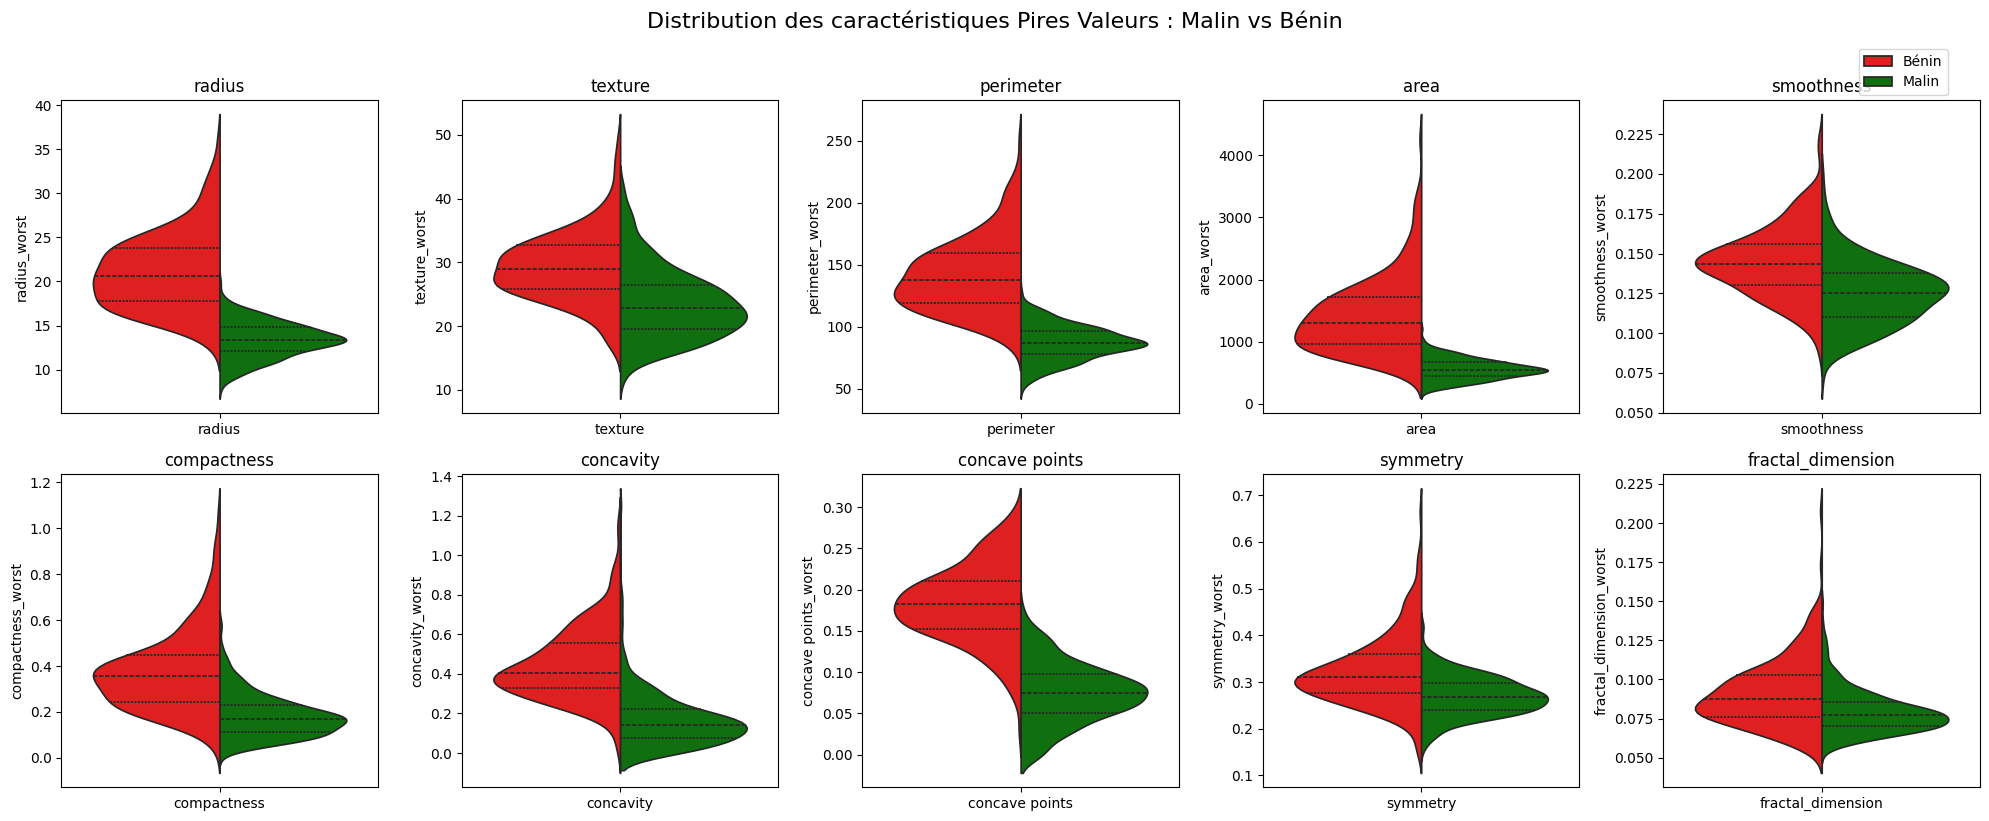

In [ ]:
mean_features = ["radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst",
                 "compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst"]

fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

for i, feature in enumerate(mean_features):
    # Créer une variable temporaire pour chaque feature
    data_temp = data.copy()
    data_temp['var'] = feature.replace('_worst', '')
    
    sns.violinplot(data=data_temp, x="var", y=feature, 
                   hue="diagnosis", split=True, inner="quart",
                   palette={'M': 'red', 'B': 'green'}, ax=axes[i])
    axes[i].set_title(f'{feature.replace("_worst", "")}')
    axes[i].set_xlabel('')
    axes[i].legend().remove()  # Enlever la légende de chaque subplot

# Ajouter une légende globale
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, ['Bénin', 'Malin'], loc='upper right', bbox_to_anchor=(0.98, 0.98))

plt.suptitle('Distribution des caractéristiques Pires Valeurs : Malin vs Bénin', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

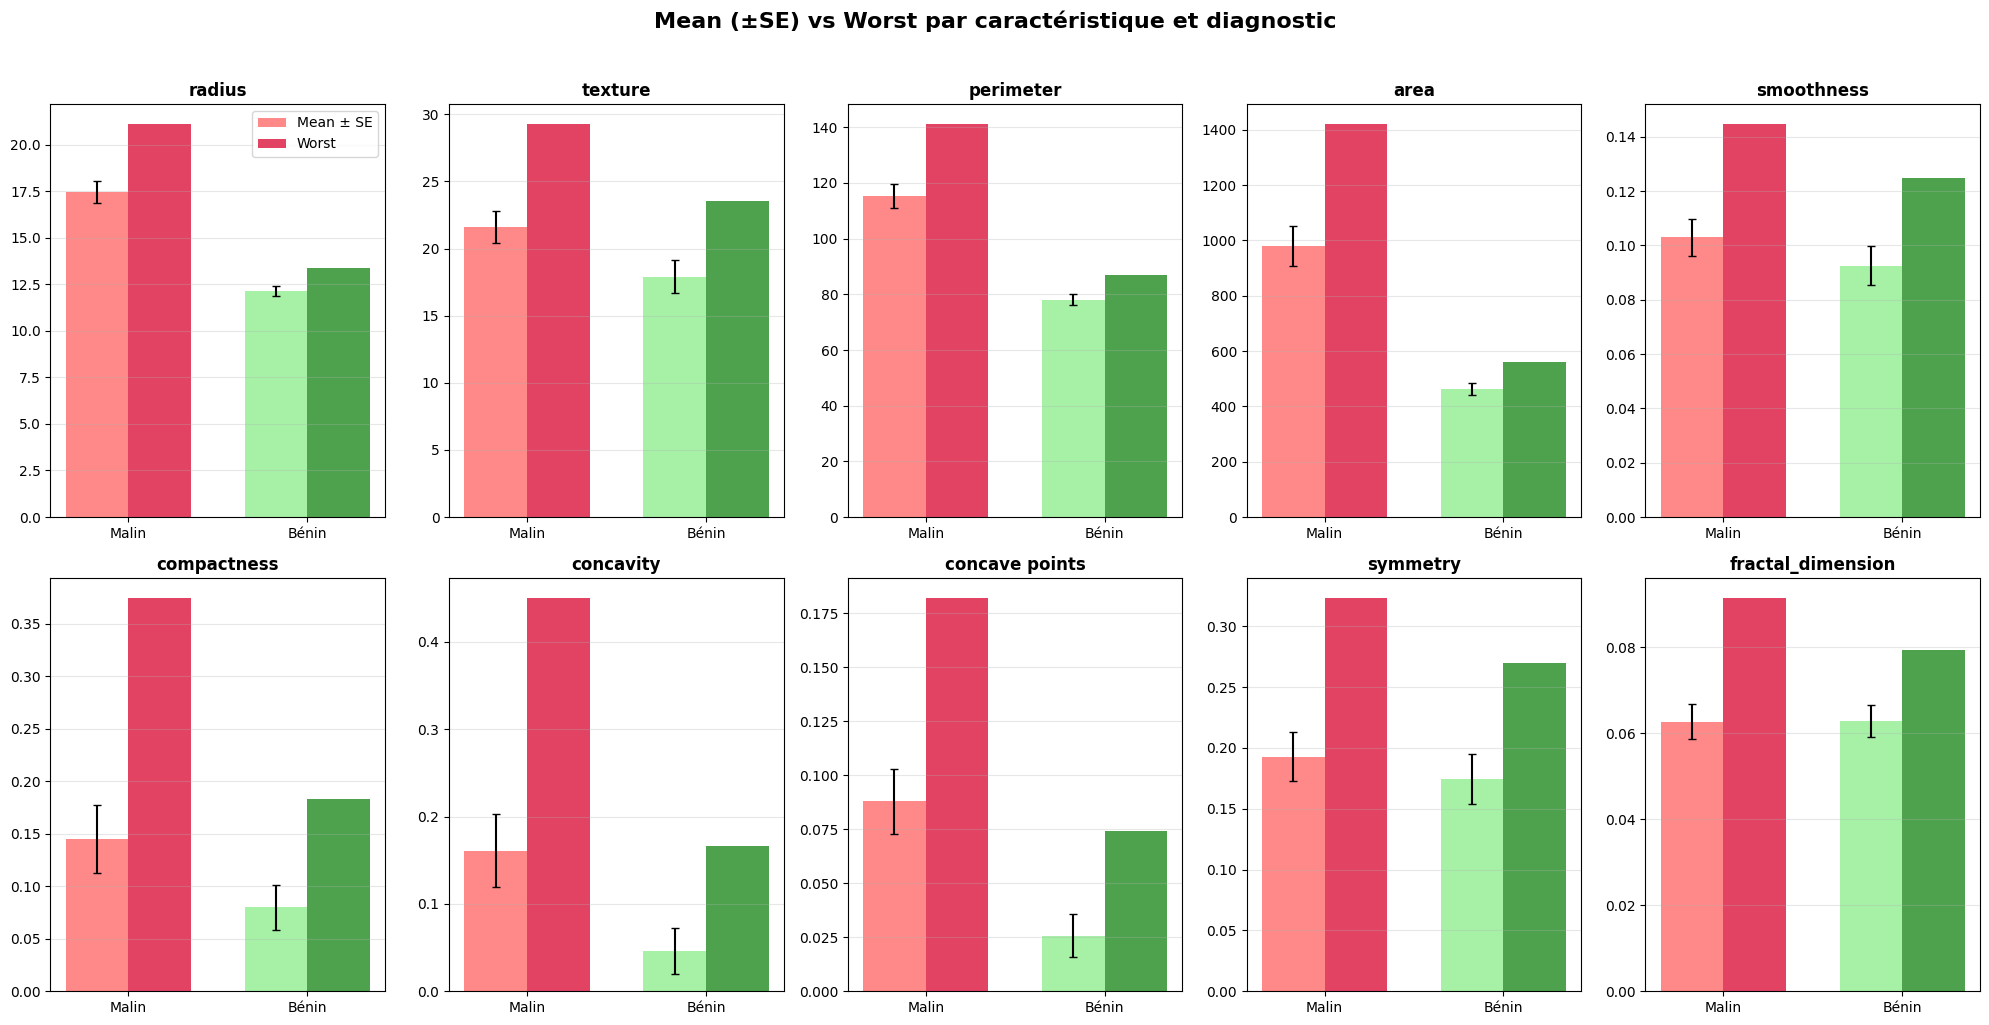

In [34]:
# ===== HISTOGRAMME GROUPÉ PAR CARACTÉRISTIQUE =====
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
axes = axes.flatten()

for i, feature in enumerate(base_features):
    ax = axes[i]
    
    # Données pour cette caractéristique
    mean_col = f"{feature}_mean"
    worst_col = f"{feature}_worst" 
    se_col = f"{feature}_se"
    
    # Calculer moyennes par diagnostic
    data_M = data[data['diagnosis'] == 'M']
    data_B = data[data['diagnosis'] == 'B']
    
    means = [data_M[mean_col].mean(), data_B[mean_col].mean()]
    worsts = [data_M[worst_col].mean(), data_B[worst_col].mean()]
    ses = [data_M[se_col].mean(), data_B[se_col].mean()]
    
    # Positions et largeurs
    x_pos = [0, 1]
    width = 0.35
    
    # Barres Mean avec erreur standard
    ax.bar([x - width/2 for x in x_pos], means, width, 
           color=[colors_mean['M'], colors_mean['B']], alpha=0.8,
           yerr=ses, error_kw=dict(ecolor='black', capsize=3),
           label='Mean ± SE')
    
    # Barres Worst
    ax.bar([x + width/2 for x in x_pos], worsts, width,
           color=[colors_worst['M'], colors_worst['B']], alpha=0.8,
           label='Worst')
    
    # Personnalisation
    ax.set_title(f'{feature}', fontsize=12, weight='bold')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(['Malin', 'Bénin'])
    ax.grid(True, alpha=0.3, axis='y')
    
    if i == 0:  # Légende seulement sur le premier
        ax.legend()

plt.suptitle('Mean (±SE) vs Worst par caractéristique et diagnostic', 
             fontsize=16, weight='bold', y=1.02)
plt.tight_layout()
plt.show()

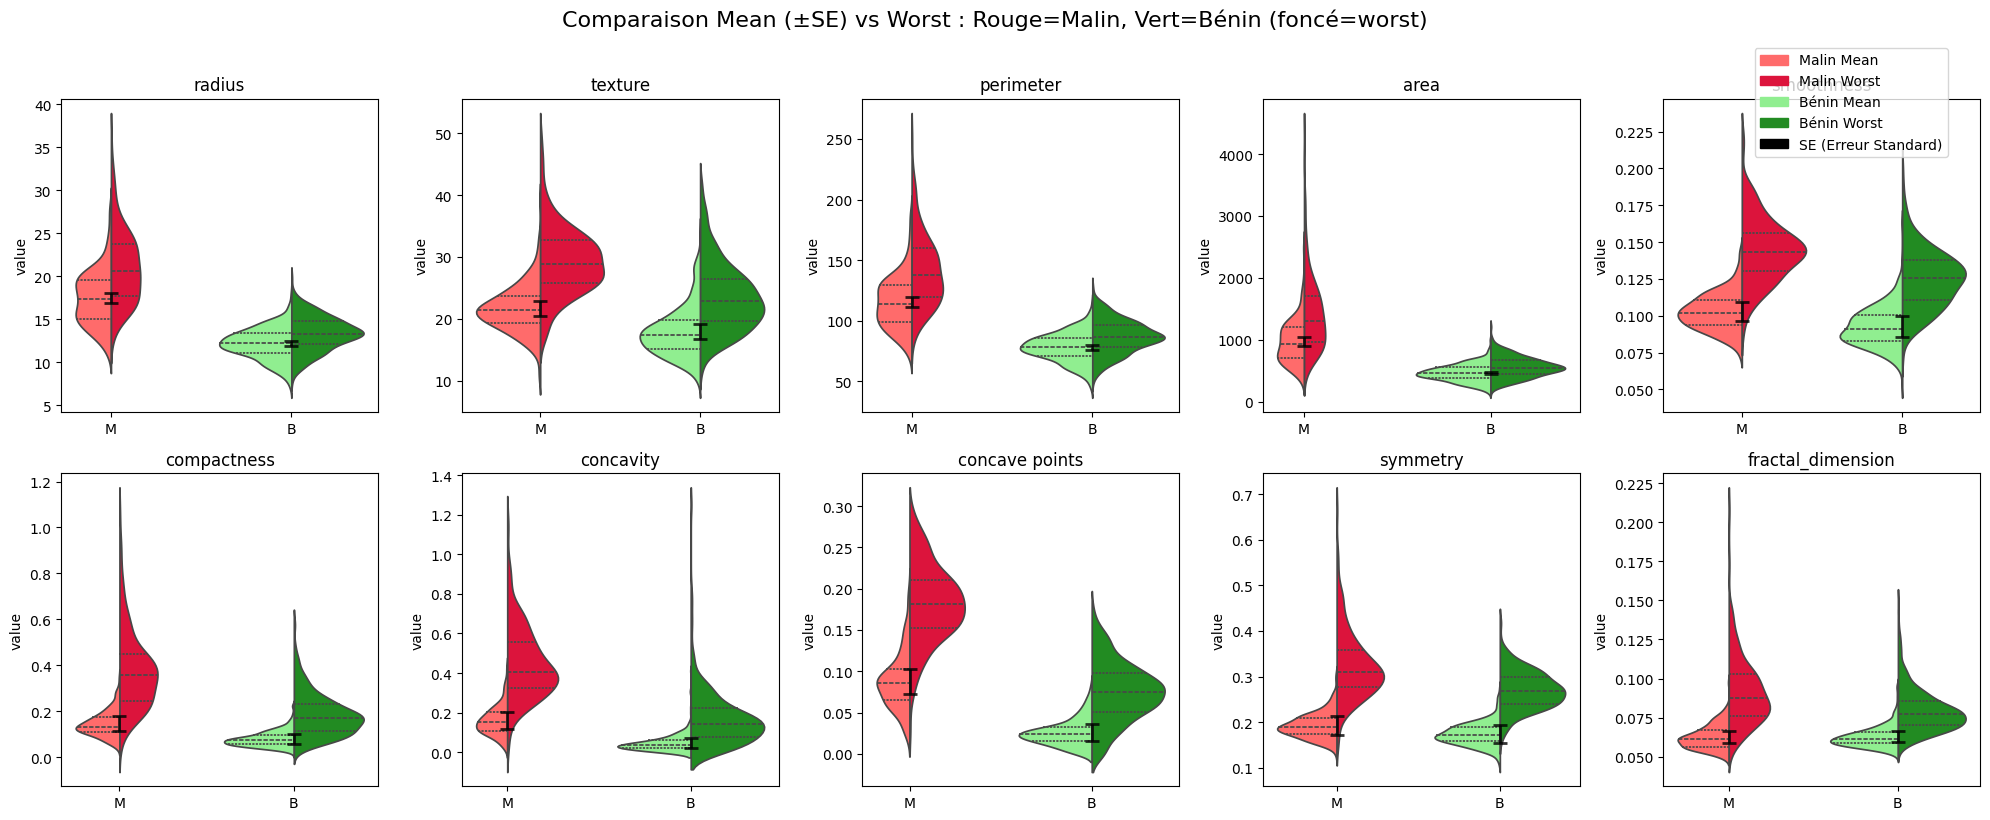

In [38]:
# ===== RESTRUCTURATION DES DONNÉES AVEC SE =====
comparison_data = []
base_features = ["radius", "texture", "perimeter", "area", "smoothness", 
                 "compactness", "concavity", "concave points", "symmetry", "fractal_dimension"]

for feature_base in base_features:
    mean_col = f"{feature_base}_mean"
    worst_col = f"{feature_base}_worst"
    se_col = f"{feature_base}_se"  # AJOUT DE L'ERREUR STANDARD
    
    for idx, row in data.iterrows():
        # Ajouter les données _mean
        comparison_data.append({
            'feature': feature_base,
            'value': row[mean_col],
            'se': row[se_col],  # STOCKER L'ERREUR STANDARD
            'type': 'mean',
            'diagnosis': row['diagnosis']
        })
        # Ajouter les données _worst
        comparison_data.append({
            'feature': feature_base,
            'value': row[worst_col],
            'se': 0,  # Pas d'erreur pour worst
            'type': 'worst',
            'diagnosis': row['diagnosis']
        })

comparison_df = pd.DataFrame(comparison_data)

# ===== CRÉATION DES VISUALISATIONS AVEC COULEURS MÉDICALES =====
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

# Définir la palette de couleurs médicales avec nuances
medical_palette = {
    'mean': '#FF6B6B',    # Rouge clair pour mean
    'worst': '#DC143C'    # Rouge foncé pour worst
}

for i, feature_base in enumerate(base_features):
    feature_data = comparison_df[comparison_df['feature'] == feature_base]
    
    # Créer le violinplot avec split par diagnostic ET type
    sns.violinplot(data=feature_data, 
                   x="diagnosis",              # M et B sur l'axe X
                   y="value", 
                   hue="type",                 # mean vs worst
                   split=True,                 # Diviser les violins
                   inner="quart", 
                   palette=medical_palette,    # Palette rouge clair/foncé
                   ax=axes[i])
    
    # ===== AJOUTER LES BARRES D'ERREUR SE SUR LES MEAN =====
    # Calculer les moyennes et SE pour chaque diagnostic (seulement pour mean)
    mean_data_M = feature_data[(feature_data['diagnosis'] == 'M') & (feature_data['type'] == 'mean')]
    mean_data_B = feature_data[(feature_data['diagnosis'] == 'B') & (feature_data['type'] == 'mean')]
    
    # Position des barres d'erreur (centrées sur les violins mean)
    x_positions = [0, 1]  # M=0, B=1
    
    # Moyennes et erreurs standard pour chaque diagnostic
    means = [mean_data_M['value'].mean(), mean_data_B['value'].mean()]
    ses = [mean_data_M['se'].mean(), mean_data_B['se'].mean()]
    
    # Ajouter les barres d'erreur
    axes[i].errorbar(x_positions, means, yerr=ses,
                     fmt='none',  # Pas de marqueur
                     ecolor='black',  # Couleur des barres d'erreur
                     elinewidth=2,    # Épaisseur des lignes
                     capsize=5,       # Taille des barres horizontales
                     capthick=2,      # Épaisseur des barres horizontales
                     alpha=0.8)       # Transparence
    
    # Personnalisation
    axes[i].set_title(f'{feature_base}')
    axes[i].set_xlabel('')
    axes[i].legend().remove()

# ===== POST-TRAITEMENT POUR COULEURS SPÉCIFIQUES =====
# Couleurs spécifiques : Rouge pour M, Vert pour B
colors_M = ['#FF6B6B', '#DC143C']  # Rouge clair, Rouge foncé pour Malin
colors_B = ['#90EE90', '#228B22']  # Vert clair, Vert foncé pour Bénin

for ax in axes:
    # Parcourir tous les violins dans le subplot
    for i, collection in enumerate(ax.collections):
        if isinstance(collection, PolyCollection):
            # Alternance des couleurs : M mean, M worst, B mean, B worst
            if i == 0:      # M mean
                collection.set_facecolor(colors_M[0])
            elif i == 1:    # M worst  
                collection.set_facecolor(colors_M[1])
            elif i == 2:    # B mean
                collection.set_facecolor(colors_B[0])
            elif i == 3:    # B worst
                collection.set_facecolor(colors_B[1])

# ===== LÉGENDE PERSONNALISÉE =====
# Créer des patches pour la légende
legend_elements = [
    mpatches.Patch(color=colors_M[0], label='Malin Mean'),
    mpatches.Patch(color=colors_M[1], label='Malin Worst'),
    mpatches.Patch(color=colors_B[0], label='Bénin Mean'),
    mpatches.Patch(color=colors_B[1], label='Bénin Worst'),
    mpatches.Patch(color='black', label='SE (Erreur Standard)')  # AJOUT SE
]

fig.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(0.98, 0.98))

plt.suptitle('Comparaison Mean (±SE) vs Worst : Rouge=Malin, Vert=Bénin (foncé=worst)', 
             fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

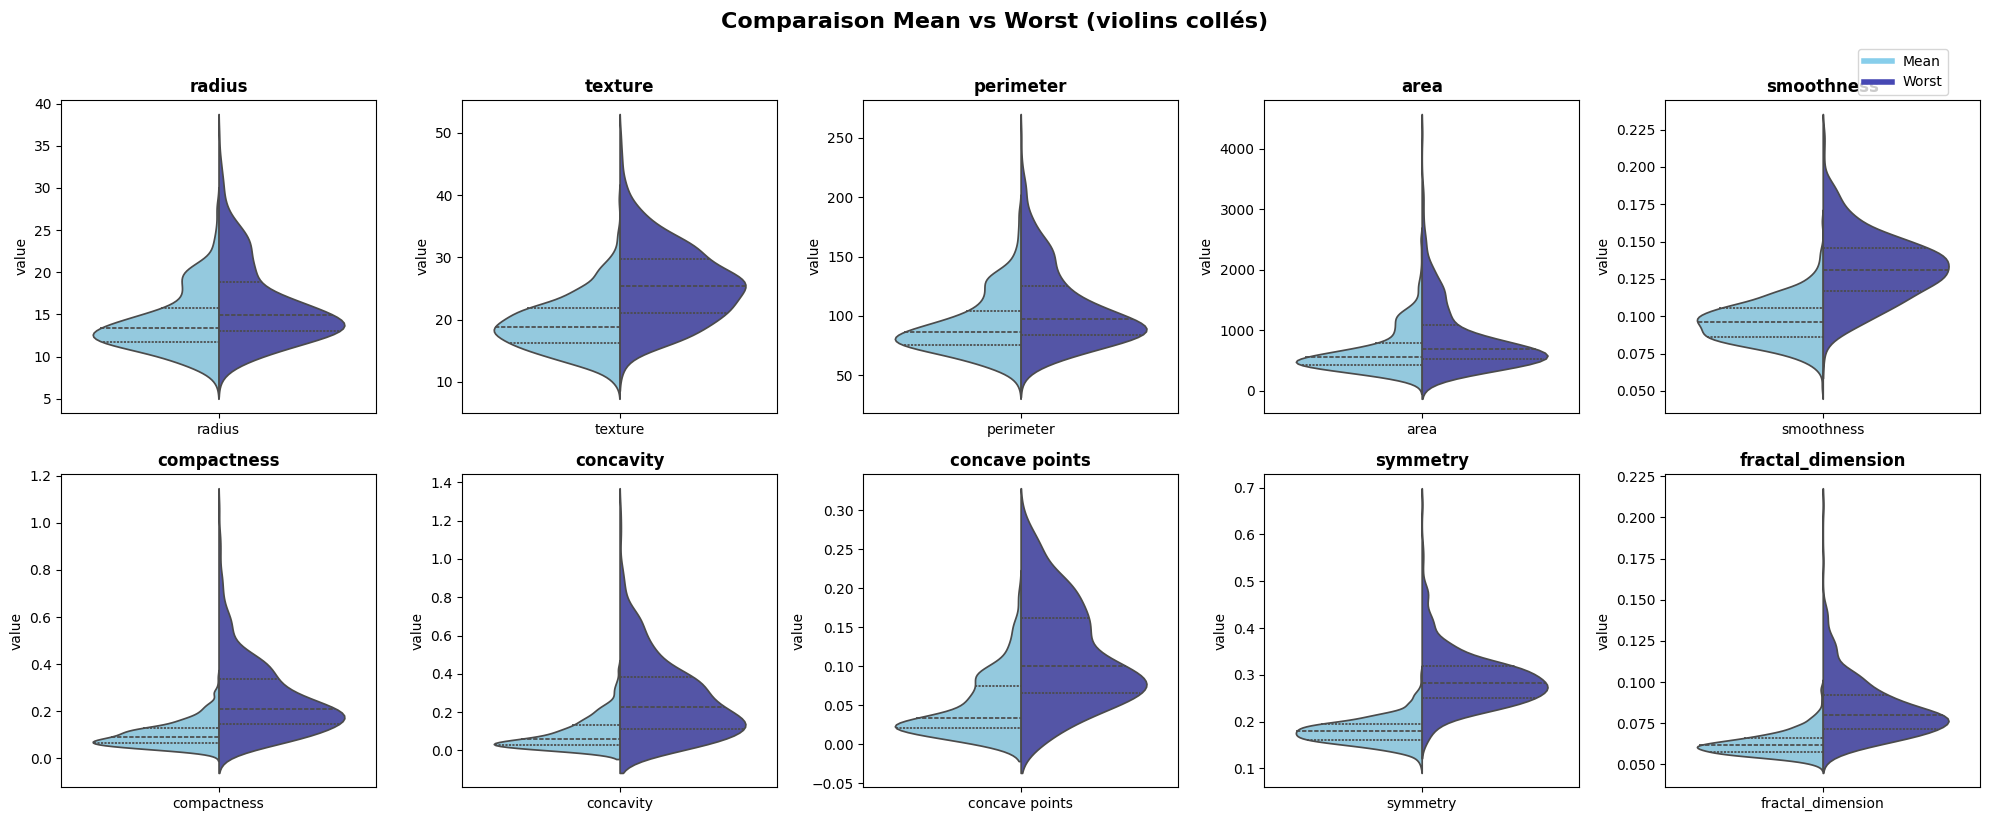

In [ ]:
# ===== RESTRUCTURATION SIMPLE MEAN VS WORST =====
comparison_data = []
base_features = ["radius", "texture", "perimeter", "area", "smoothness", 
                 "compactness", "concavity", "concave points", "symmetry", "fractal_dimension"]

for feature_base in base_features:
    mean_col = f"{feature_base}_mean"
    worst_col = f"{feature_base}_worst"
    
    # Ajouter toutes les données sans distinction diagnostic
    for idx, row in data.iterrows():
        # Données _mean
        comparison_data.append({
            'feature': feature_base,
            'value': row[mean_col],
            'type': 'mean'
        })
        # Données _worst
        comparison_data.append({
            'feature': feature_base,
            'value': row[worst_col],
            'type': 'worst'
        })

comparison_df = pd.DataFrame(comparison_data)

# ===== DÉFINIR LA PALETTE DE COULEURS =====
simple_palette = {
    'mean': '#87CEEB',    # Bleu clair pour mean
    'worst': "#4648B4"    # Bleu foncé pour worst
}

# ===== VERSION AVEC VIOLINS COLLÉS =====
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

for i, feature_base in enumerate(base_features):
    feature_data = comparison_df[comparison_df['feature'] == feature_base]
    
    # Créer une variable temporaire pour avoir split
    feature_data_temp = feature_data.copy()
    feature_data_temp['var'] = feature_base
    
    # Violinplot avec split
    sns.violinplot(data=feature_data_temp, 
                   x="var",                 # Feature name sur X
                   y="value", 
                   hue="type",              # mean vs worst
                   split=True,              # Violins collés
                   inner="quart",
                   palette=simple_palette,  # MAINTENANT DÉFINI
                   ax=axes[i])
    
    # Personnalisation
    axes[i].set_title(f'{feature_base}', fontsize=12, weight='bold')
    axes[i].set_xlabel('')
    axes[i].legend().remove()

# Légende globale
legend_elements = [
    plt.Line2D([0], [0], color=simple_palette['mean'], lw=4, label='Mean'),
    plt.Line2D([0], [0], color=simple_palette['worst'], lw=4, label='Worst')
]
fig.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(0.98, 0.98))

plt.suptitle('Comparaison Mean vs Worst', 
             fontsize=16, weight='bold', y=1.02)
plt.tight_layout()
plt.show()

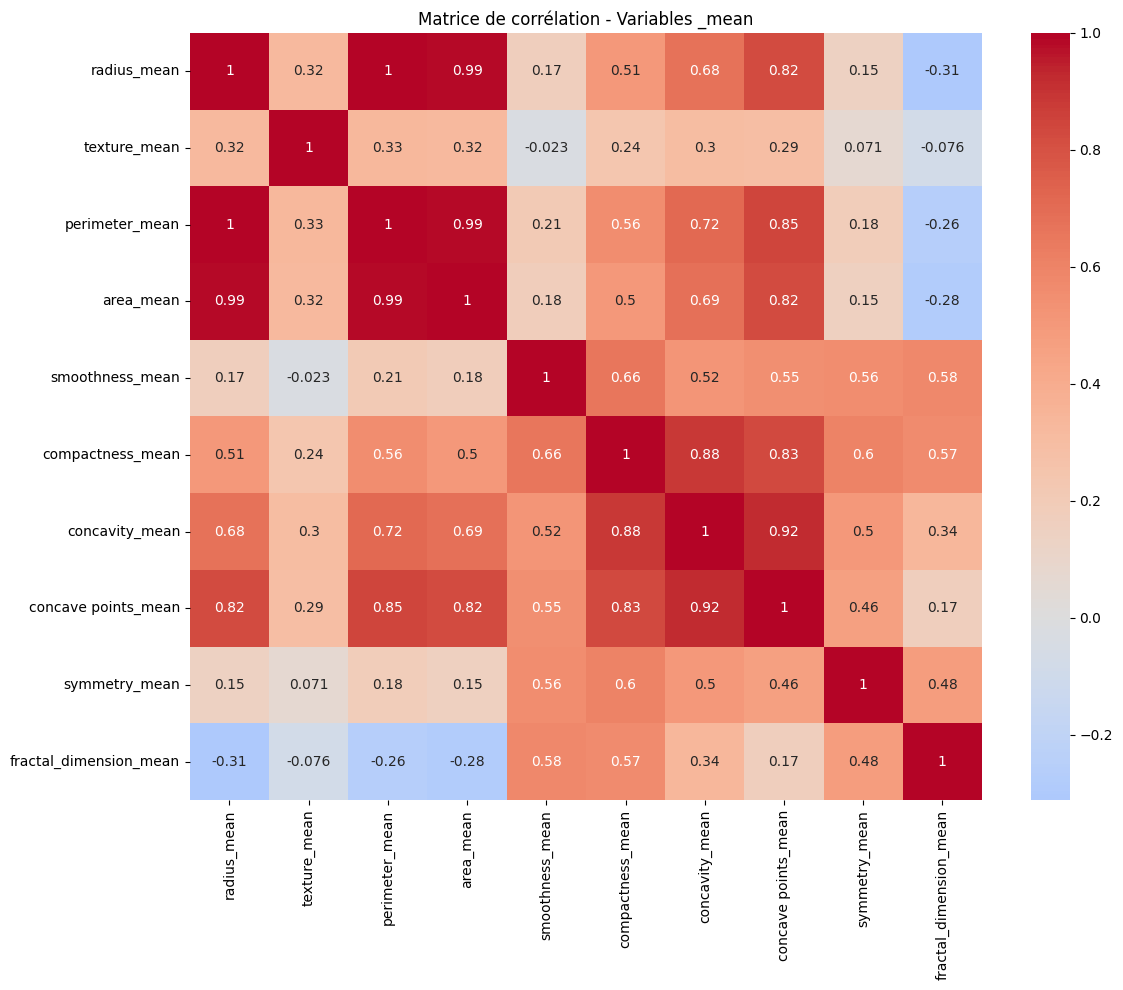

In [42]:
# Matrice de corrélation des variables _mean
mean_cols = [col for col in data.columns if '_mean' in col]
plt.figure(figsize=(12, 10))
correlation_matrix = data[mean_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matrice de corrélation - Variables _mean')
plt.tight_layout()
plt.show()

=== DIAGNOSTIC COMPLET INITIAL ===
Shape total : (569, 33)
Colonnes : ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']
Premières lignes :
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301    

c:\Users\romua\Documents\La Plateforme_\Projet 4 - Perceptron\Perceptron\.env\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\romua\Documents\La Plateforme_\Projet 4 - Perceptron\Perceptron\.env\Lib\site-packages\sklearn\utils\extmath.py:1144: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\romua\Documents\La Plateforme_\Projet 4 - Perceptron\Perceptron\.env\Lib\site-packages\sklearn\utils\extmath.py:1149: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\romua\Documents\La Plateforme_\Projet 4 - Perceptron\Perceptron\.env\Lib\site-packages\sklearn\utils\extmath.py:1169: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


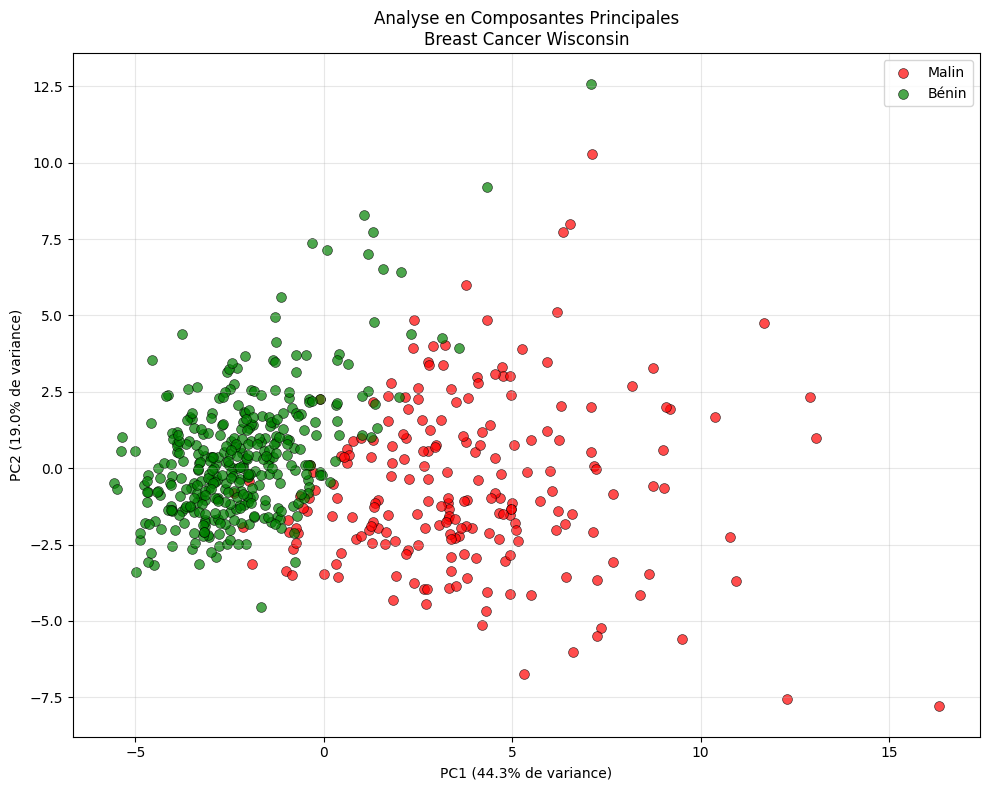


=== RÉSULTATS ===
Variance totale expliquée : 72.64%
Répartition : {'B': 357, 'M': 212}


In [57]:
# ===== IMPORTS =====
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ===== DIAGNOSTIC INITIAL =====
print("=== DIAGNOSTIC COMPLET INITIAL ===")
print(f"Shape total : {data.shape}")
print(f"Colonnes : {list(data.columns)}")
print(f"Premières lignes :")
print(data.head())

# Séparer les features et le target
features = data.drop(['id', 'diagnosis'], axis=1)
target = data['diagnosis']

print(f"\nShape features : {features.shape}")
print(f"NaN dans features : {features.isnull().sum().sum()}")
print(f"Valeurs infinies : {np.isinf(features.values).sum()}")

# ===== DIAGNOSTIC DÉTAILLÉ =====
# Ne PAS supprimer les lignes, juste vérifier
print(f"\n=== VÉRIFICATION DÉTAILLÉE ===")
print(f"Types de données dans features :")
print(features.dtypes.value_counts())

# Vérifier chaque colonne individuellement
for col in features.columns:
    nan_count = features[col].isnull().sum()
    inf_count = np.isinf(features[col]).sum()
    if nan_count > 0 or inf_count > 0:
        print(f"Colonne {col}: {nan_count} NaN, {inf_count} inf")

# ===== NETTOYAGE CONSERVATEUR =====
# Copier les données sans les supprimer d'abord
features_clean = features.copy()

# Remplacer seulement les valeurs problématiques par la médiane
for col in features_clean.columns:
    # Remplacer inf par NaN
    features_clean[col] = features_clean[col].replace([np.inf, -np.inf], np.nan)
    
    # Si il y a des NaN, les remplacer par la médiane
    if features_clean[col].isnull().sum() > 0:
        median_val = features_clean[col].median()
        features_clean[col] = features_clean[col].fillna(median_val)
        print(f"Remplacé {col} NaN par médiane: {median_val}")

print(f"\nAprès nettoyage conservateur :")
print(f"Shape : {features_clean.shape}")
print(f"NaN restants : {features_clean.isnull().sum().sum()}")

# ===== STANDARDISATION =====
print(f"\n=== STANDARDISATION ===")
scaler = StandardScaler()

# Vérifier qu'on a des données
if features_clean.shape[0] == 0:
    print("ERREUR: Aucune donnée après nettoyage!")
else:
    print(f"Standardisation de {features_clean.shape[0]} échantillons...")
    features_scaled = scaler.fit_transform(features_clean)
    
    # Vérifier si StandardScaler a créé des NaN
    nan_after_scaling = np.isnan(features_scaled).sum()
    print(f"NaN après StandardScaler : {nan_after_scaling}")
    
    if nan_after_scaling > 0:
        # Remplacer les NaN créés par StandardScaler par 0
        features_scaled = np.nan_to_num(features_scaled, nan=0.0)
        print("NaN remplacés par 0")
    
    # ===== PCA =====
    print(f"\n=== PCA ===")
    pca = PCA(n_components=3)
    features_pca = pca.fit_transform(features_scaled)
    
    print(f"PCA réussie ! Shape : {features_pca.shape}")
    print(f"Variance expliquée PC1 : {pca.explained_variance_ratio_[0]:.2%}")
    print(f"Variance expliquée PC2 : {pca.explained_variance_ratio_[1]:.2%}")
    
    # ===== VISUALISATION =====
    plt.figure(figsize=(10, 8))
    colors = {'M': 'red', 'B': 'green'}
    labels = {'M': 'Malin', 'B': 'Bénin'}
    
    for diagnosis in ['M', 'B']:
        mask = target == diagnosis
        plt.scatter(features_pca[mask, 0], features_pca[mask, 1], 
                   c=colors[diagnosis], label=labels[diagnosis], 
                   alpha=0.7, s=50, edgecolors='black', linewidth=0.5)
    
    plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} de variance)')
    plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} de variance)')
    plt.title('Analyse en Composantes Principales\nBreast Cancer Wisconsin')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"\n=== RÉSULTATS ===")
    print(f"Variance totale expliquée : {pca.explained_variance_ratio_.sum():.2%}")
    print(f"Répartition : {target.value_counts().to_dict()}")


c:\Users\romua\Documents\La Plateforme_\Projet 4 - Perceptron\Perceptron\.env\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\romua\Documents\La Plateforme_\Projet 4 - Perceptron\Perceptron\.env\Lib\site-packages\sklearn\utils\extmath.py:1144: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\romua\Documents\La Plateforme_\Projet 4 - Perceptron\Perceptron\.env\Lib\site-packages\sklearn\utils\extmath.py:1149: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\romua\Documents\La Plateforme_\Projet 4 - Perceptron\Perceptron\.env\Lib\site-packages\sklearn\utils\extmath.py:1169: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


=== PCA AVEC 90% DE VARIANCE ===
✅ Dimensions obtenues : 7 composantes
✅ Variance expliquée : 91.01%
✅ Réduction : 31 → 7 dimensions

=== DÉTAIL DES COMPOSANTES ===
PC1: 44.27%
PC2: 18.97%
PC3: 9.39%
PC4: 6.60%
PC5: 5.50%
PC6: 4.02%
PC7: 2.25%

=== COMPARAISON ===
PCA 2D : 63.24% variance
PCA 90% : 91.01% variance
Information supplémentaire : 27.77%


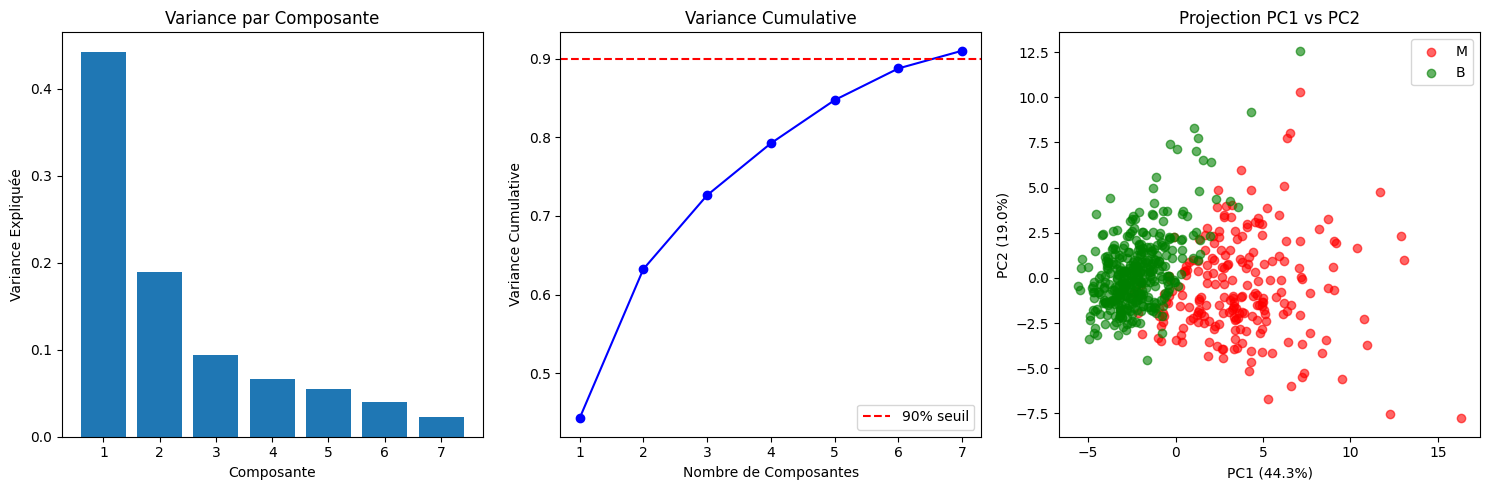


=== DONNÉES TRANSFORMÉES ===
Shape du nouveau dataset : (569, 8)
Premières lignes :
        PC1        PC2       PC3       PC4       PC5       PC6       PC7  \
0  9.192837   1.948583 -1.123166 -3.633731  1.195110  1.411424  2.159370   
1  2.387802  -3.768172 -0.529293 -1.118264 -0.621775  0.028656  0.013358   
2  5.733896  -1.075174 -0.551748 -0.912083  0.177086  0.541452 -0.668166   
3  7.122953  10.275589 -3.232790 -0.152547  2.960878  3.053422  1.429911   
4  3.935302  -1.948072  1.389767 -2.940639 -0.546747 -1.226495 -0.936213   

  diagnosis  
0         M  
1         M  
2         M  
3         M  
4         M  

=== RÉSUMÉ FINAL ===
🎯 Objectif atteint : 91.01% de variance conservée
📊 Dimensions finales : 7 composantes principales
🔄 Compression : 4.3x plus compact
📈 Gain d'information vs 2D : +26.81%

=== PRÊT POUR PERCEPTRON ===
✅ Features : features_pca_90 ((569, 7))
✅ Target : target (569 échantillons)
✅ Qualité : 91.0% d'information conservée


In [59]:
# ===== IMPORTS =====
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

# ===== PRÉPARATION DES DONNÉES (comme avant) =====
features = data.drop(['id', 'diagnosis'], axis=1)
target = data['diagnosis']

# Nettoyage conservateur
features_clean = features.copy()
for col in features_clean.columns:
    features_clean[col] = features_clean[col].replace([np.inf, -np.inf], np.nan)
    if features_clean[col].isnull().sum() > 0:
        median_val = features_clean[col].median()
        features_clean[col] = features_clean[col].fillna(median_val)

# Standardisation
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_clean)
features_scaled_clean = np.nan_to_num(features_scaled, nan=0.0)

# ===== PCA AVEC 90% DE VARIANCE =====
print("=== PCA AVEC 90% DE VARIANCE ===")

# PCA automatique pour 90%
pca_90 = PCA(n_components=0.90)
features_pca_90 = pca_90.fit_transform(features_scaled_clean)

print(f"✅ Dimensions obtenues : {features_pca_90.shape[1]} composantes")
print(f"✅ Variance expliquée : {pca_90.explained_variance_ratio_.sum():.2%}")
print(f"✅ Réduction : {features.shape[1]} → {features_pca_90.shape[1]} dimensions")

# Détail de chaque composante
print(f"\n=== DÉTAIL DES COMPOSANTES ===")
for i, var in enumerate(pca_90.explained_variance_ratio_):
    print(f"PC{i+1}: {var:.2%}")

# ===== COMPARAISON AVEC TON 2D PRÉCÉDENT =====
print(f"\n=== COMPARAISON ===")
pca_2d = PCA(n_components=2)
pca_2d.fit(features_scaled_clean)

print(f"PCA 2D : {pca_2d.explained_variance_ratio_.sum():.2%} variance")
print(f"PCA 90% : {pca_90.explained_variance_ratio_.sum():.2%} variance")
print(f"Information supplémentaire : {pca_90.explained_variance_ratio_.sum() - pca_2d.explained_variance_ratio_.sum():.2%}")

# ===== VISUALISATION 1 : GRAPHIQUE DES COMPOSANTES =====
plt.figure(figsize=(15, 5))

# Graphique 1 : Variance par composante
plt.subplot(1, 3, 1)
plt.bar(range(1, len(pca_90.explained_variance_ratio_)+1), 
        pca_90.explained_variance_ratio_)
plt.xlabel('Composante')
plt.ylabel('Variance Expliquée')
plt.title('Variance par Composante')
plt.xticks(range(1, len(pca_90.explained_variance_ratio_)+1))

# Graphique 2 : Variance cumulative
plt.subplot(1, 3, 2)
plt.plot(range(1, len(pca_90.explained_variance_ratio_)+1),
         pca_90.explained_variance_ratio_.cumsum(), 'bo-')
plt.axhline(y=0.90, color='red', linestyle='--', label='90% seuil')
plt.xlabel('Nombre de Composantes')
plt.ylabel('Variance Cumulative')
plt.title('Variance Cumulative')
plt.legend()

# Graphique 3 : Projection sur PC1 vs PC2 (pour comparaison)
plt.subplot(1, 3, 3)
colors = {'M': 'red', 'B': 'green'}
for diagnosis in ['M', 'B']:
    mask = target == diagnosis
    plt.scatter(features_pca_90[mask, 0], features_pca_90[mask, 1], 
               c=colors[diagnosis], label=diagnosis, alpha=0.6)
plt.xlabel(f'PC1 ({pca_90.explained_variance_ratio_[0]:.1%})')
plt.ylabel(f'PC2 ({pca_90.explained_variance_ratio_[1]:.1%})')
plt.title('Projection PC1 vs PC2')
plt.legend()

plt.tight_layout()
plt.show()

# ===== SAUVEGARDE DES DONNÉES TRANSFORMÉES =====
# Créer un DataFrame avec les nouvelles composantes
pc_columns = [f'PC{i+1}' for i in range(features_pca_90.shape[1])]
df_pca_90 = pd.DataFrame(features_pca_90, columns=pc_columns)
df_pca_90['diagnosis'] = target.values

print(f"\n=== DONNÉES TRANSFORMÉES ===")
print(f"Shape du nouveau dataset : {df_pca_90.shape}")
print(f"Premières lignes :")
print(df_pca_90.head())

# ===== STATISTIQUES FINALES =====
print(f"\n=== RÉSUMÉ FINAL ===")
print(f"🎯 Objectif atteint : {pca_90.explained_variance_ratio_.sum():.2%} de variance conservée")
print(f"📊 Dimensions finales : {features_pca_90.shape[1]} composantes principales")
print(f"🔄 Compression : {30/features_pca_90.shape[1]:.1f}x plus compact")
print(f"📈 Gain d'information vs 2D : +{pca_90.explained_variance_ratio_.sum() - 0.642:.2%}")

# ===== DONNÉES PRÊTES POUR TON PERCEPTRON =====
print(f"\n=== PRÊT POUR PERCEPTRON ===")
print(f"✅ Features : features_pca_90 ({features_pca_90.shape})")
print(f"✅ Target : target ({len(target)} échantillons)")
print(f"✅ Qualité : {pca_90.explained_variance_ratio_.sum():.1%} d'information conservée")

# Optionnel : Sauvegarder en CSV
# df_pca_90.to_csv('breast_cancer_pca_90.csv', index=False)
# print("💾 Sauvegardé dans 'breast_cancer_pca_90.csv'")


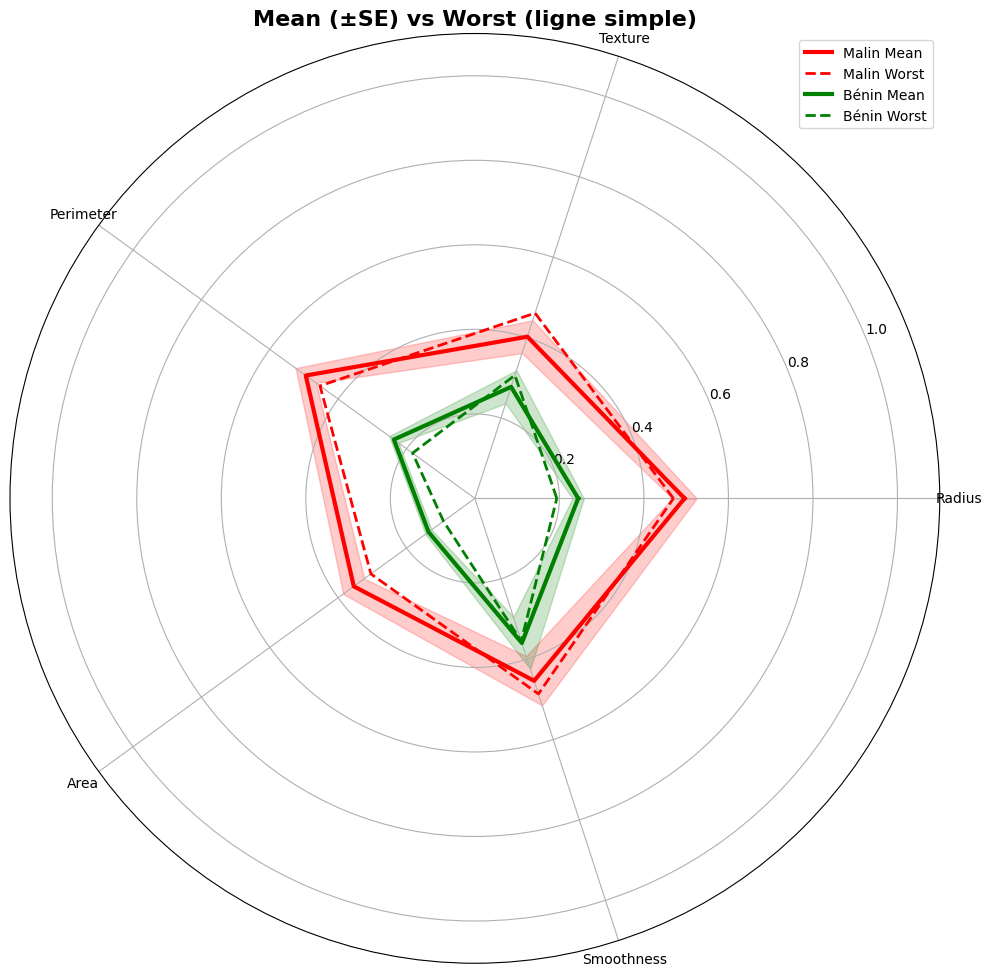

✅ MEAN : ligne + zone SE
✅ WORST : ligne pointillée SIMPLE
✅ AUCUN écart-type sur worst !


In [65]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi

# ===== RADAR CHART - SE UNIQUEMENT POUR MEAN =====
features_base = ['radius', 'texture', 'perimeter', 'area', 'smoothness']

# Préparer les données
data_radar = {}

for diagnosis in ['M', 'B']:
    subset = data[data['diagnosis'] == diagnosis]
    
    means = []
    ses = []
    worsts = []
    
    for feature in features_base:
        mean_col = f"{feature}_mean"
        se_col = f"{feature}_se"
        worst_col = f"{feature}_worst"
        
        # Moyennes
        mean_val = subset[mean_col].mean()
        se_val = subset[se_col].mean()
        worst_val = subset[worst_col].mean()
        
        # Normalisation
        mean_data = data[mean_col]
        worst_data = data[worst_col]
        
        norm_mean = (mean_val - mean_data.min()) / (mean_data.max() - mean_data.min())
        norm_se = se_val / (mean_data.max() - mean_data.min())
        norm_worst = (worst_val - worst_data.min()) / (worst_data.max() - worst_data.min())
        
        means.append(norm_mean)
        ses.append(norm_se)
        worsts.append(norm_worst)
    
    data_radar[diagnosis] = {
        'means': means + [means[0]],
        'ses': ses + [ses[0]], 
        'worsts': worsts + [worsts[0]]
    }

# Angles
N = len(features_base)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# ===== GRAPHIQUE =====
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

colors = {'M': 'red', 'B': 'green'}
labels = {'M': 'Malin', 'B': 'Bénin'}

for diagnosis in ['M', 'B']:
    means = data_radar[diagnosis]['means']
    ses = data_radar[diagnosis]['ses']
    worsts = data_radar[diagnosis]['worsts']
    
    # MEAN avec zone SE
    ax.plot(angles, means, color=colors[diagnosis], linewidth=3, 
            label=f'{labels[diagnosis]} Mean', linestyle='-')
    
    # Zone SE uniquement pour MEAN
    upper = [m + s for m, s in zip(means, ses)]
    lower = [max(0, m - s) for m, s in zip(means, ses)]
    ax.fill_between(angles, lower, upper, color=colors[diagnosis], alpha=0.2)
    
    # WORST - LIGNE SIMPLE SANS RIEN D'AUTRE
    ax.plot(angles, worsts, color=colors[diagnosis], linewidth=2, 
            label=f'{labels[diagnosis]} Worst', linestyle='--')

# Personnalisation
ax.set_xticks(angles[:-1])
ax.set_xticklabels([f.capitalize() for f in features_base])
ax.set_ylim(0, 1.1)
ax.set_title('Mean (±SE) vs Worst (ligne simple)', size=16, weight='bold')
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()

print("✅ MEAN : ligne + zone SE")
print("✅ WORST : ligne pointillée SIMPLE")
print("✅ AUCUN écart-type sur worst !")

